In [9]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [10]:
DATASET = "2dcubes_grayscale_shapes_sequence_unidirectional"
DATASET_DIR = Path("outputs/compressed") / DATASET

In [11]:
tag = "train"
data = np.load(DATASET_DIR / f"{tag}.npz")

In [12]:
imgs = data["imgs"]
epsilon = data["epsilon"]
original_latents = data["original_latents"]

In [13]:
imgs.shape, epsilon.shape, original_latents.shape

((30, 5, 128, 128, 4), (30, 5, 6), (30, 5, 6))

In [14]:
sequence_length = imgs.shape[1]

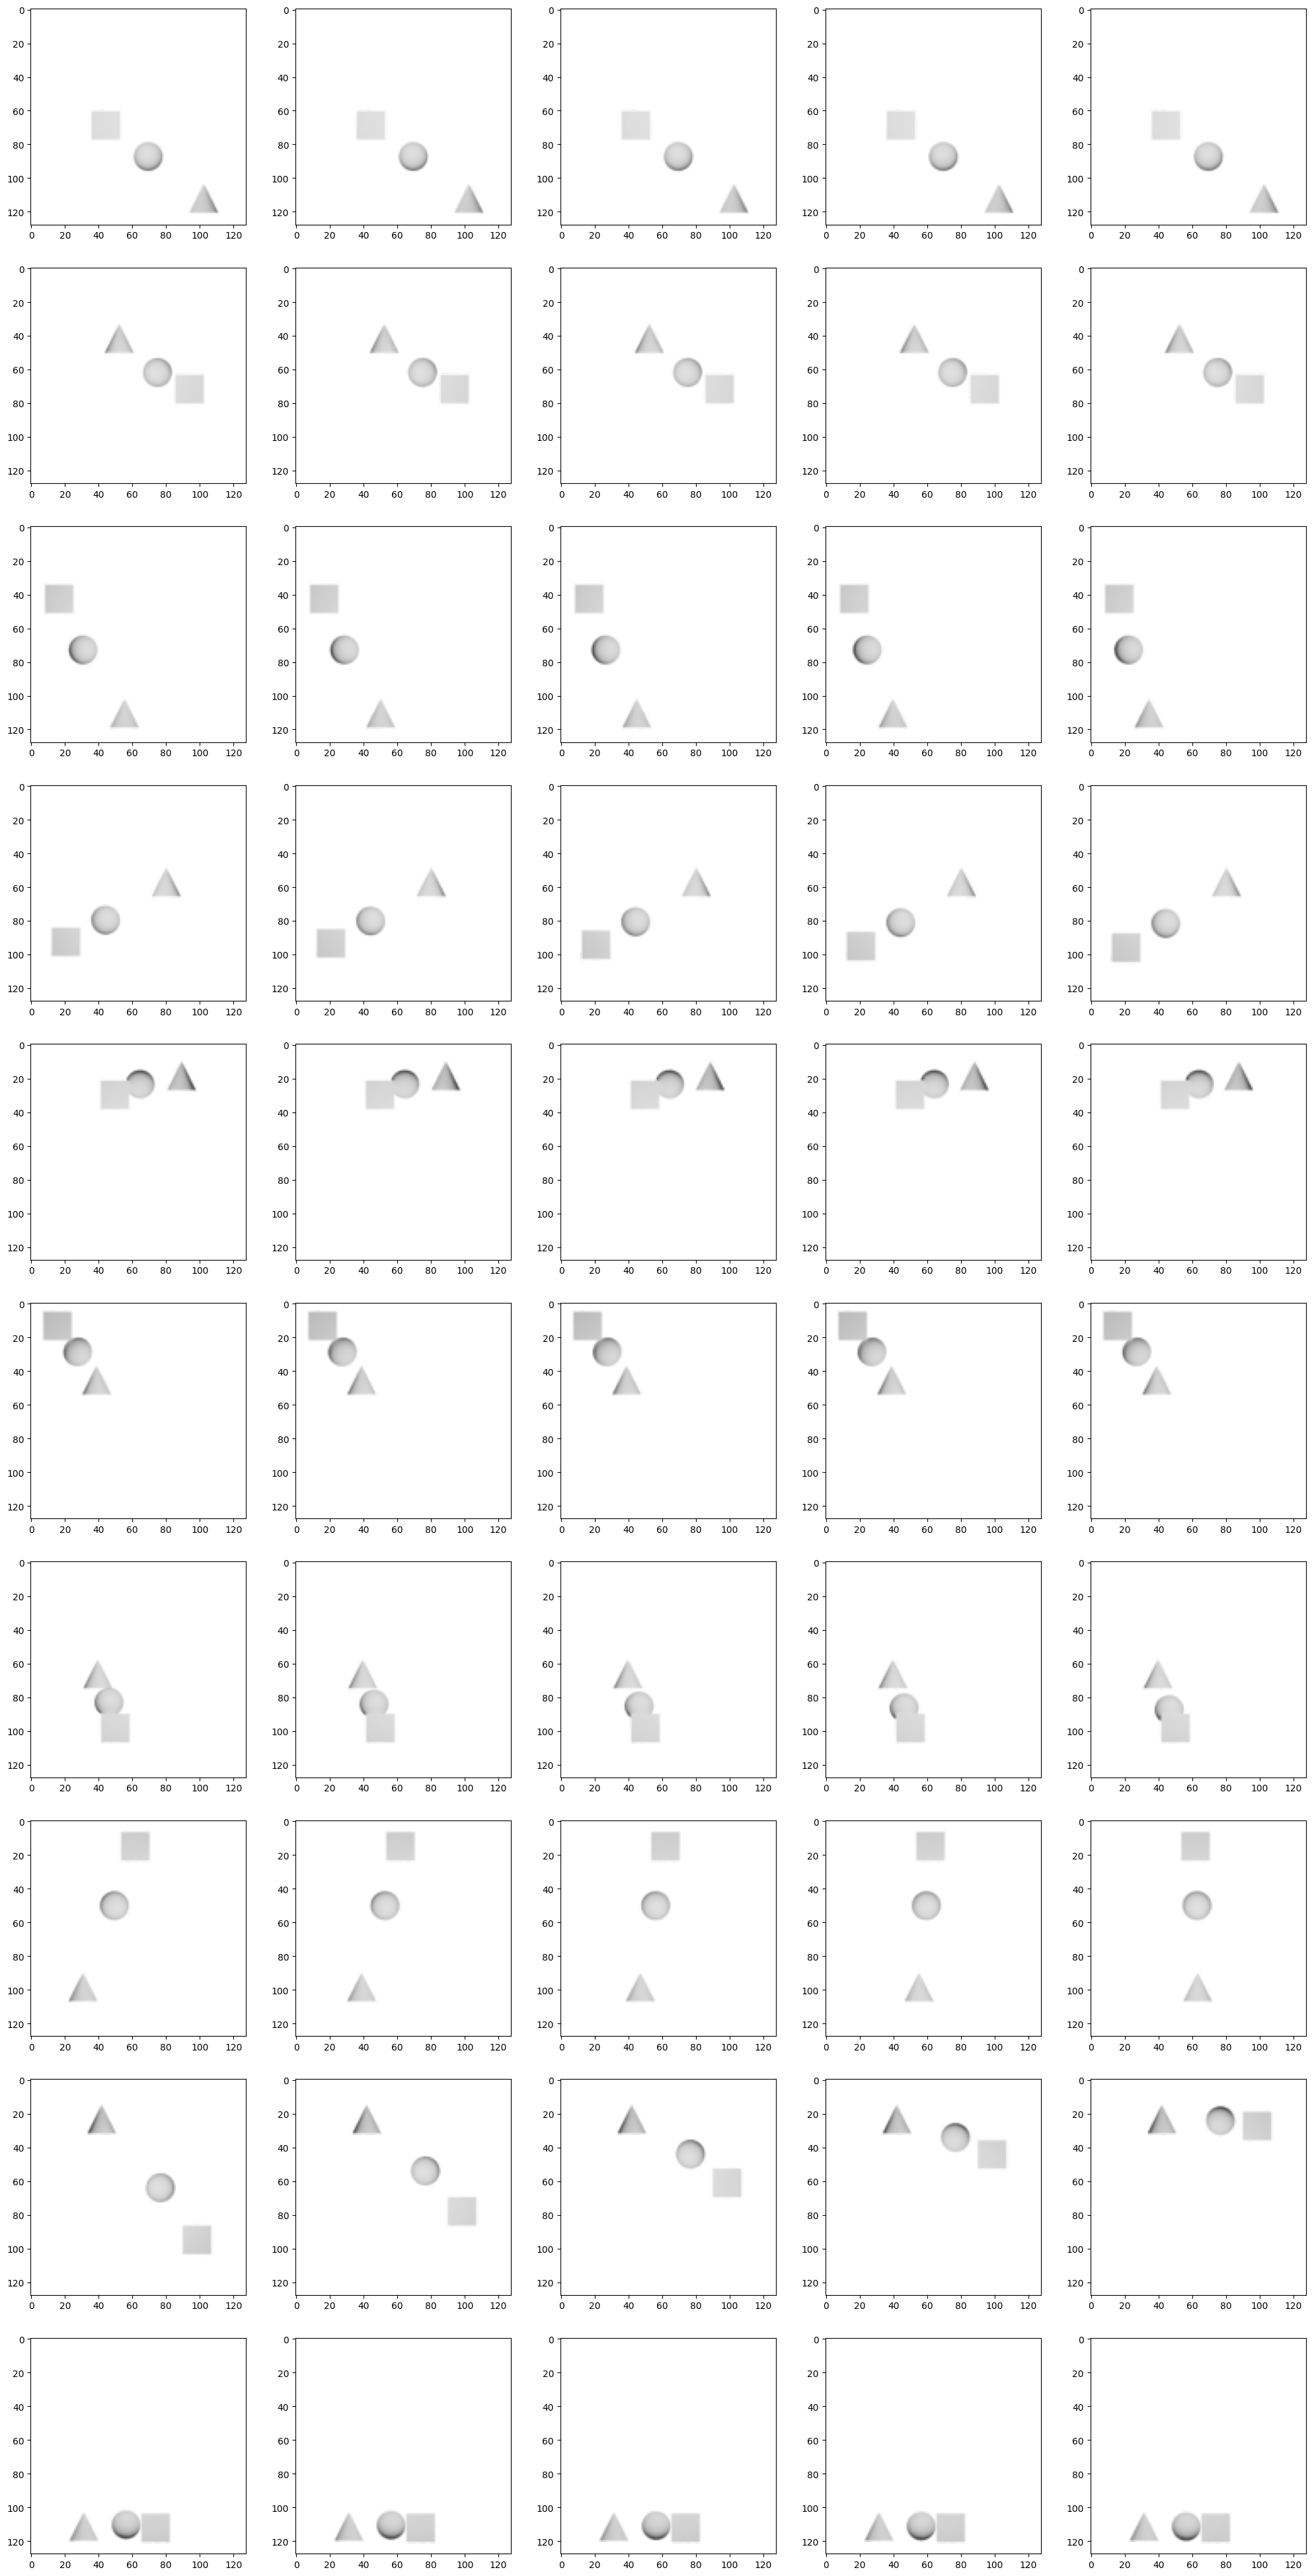

In [15]:
nrows = 10
fig, ax = plt.subplots(ncols=sequence_length, nrows=nrows, figsize=(5 * sequence_length, 5 * nrows))

for i in range(nrows):
    for j in range(sequence_length):
        ax[i, j].imshow(imgs[i, j])
        # ax[i, j].axis("off")

In [24]:
original_latents[2]

array([[-5.6718526, -3.493206 ,  2.7509928, -2.5507739, -2.303226 ,
        -3.3817804],
       [-5.6718526, -3.493206 ,  2.7509928, -2.5507739, -2.303226 ,
        -4.0313373],
       [-5.6718526, -3.493206 ,  2.7509928, -2.5507739, -2.303226 ,
        -0.8908884],
       [-5.6718526, -3.493206 ,  2.7509928, -2.5507739, -2.303226 ,
         1.5716006],
       [-5.6718526, -3.493206 ,  2.7509928, -2.5507739, -2.303226 ,
         3.29417  ],
       [-5.6718526, -3.493206 ,  2.7509928, -2.5507739, -2.303226 ,
         4.820216 ]], dtype=float32)